In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_data_df = pd.merge(city_data_df, ride_data_df, how= "inner", on="city")
reorganized_data_df = combined_data_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]


# Display the data table for preview
reorganized_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

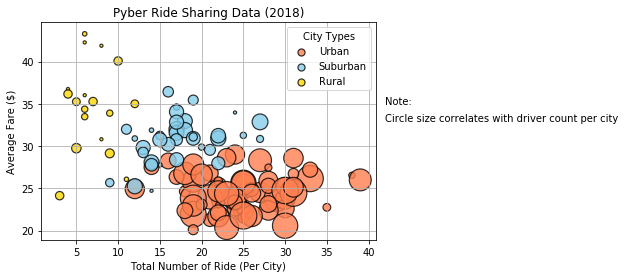

In [22]:
# Obtain the x and y coordinates for each of the three city types
grouped_data_df = reorganized_data_df.groupby(["city","type"])
avg_fare = grouped_data_df["fare"].mean()
total_ride = grouped_data_df["city"].count()
total_driver = grouped_data_df["driver_count"].mean()

simplify_df = pd.DataFrame({"Average Fare per City" : avg_fare, 
                            "Total Number of Ride Per City": total_ride,
                           "Total Number of Driver Per City" : total_driver})
simplify_df = simplify_df.reset_index()
urban_df = simplify_df.loc[simplify_df["type"]=="Urban",:]
rural_df = simplify_df.loc[simplify_df["type"]=="Rural",:]
suburban_df = simplify_df.loc[simplify_df["type"]=="Suburban",:]

# Build the scatter plots for each city types
ax = urban_df.plot(kind= "scatter", x = "Total Number of Ride Per City", y = "Average Fare per City", c= "coral",
                  s = urban_df["Total Number of Driver Per City"]*10, grid = True, label = "Urban", edgecolors = "black", alpha = .8, linewidths = 1.2)
ax1 = suburban_df.plot(kind= "scatter", x = "Total Number of Ride Per City", y = "Average Fare per City", c= "skyblue",
                  s = suburban_df["Total Number of Driver Per City"]*10, grid = True, label = "Suburban", edgecolors = "black", alpha = .8, linewidths = 1.2,ax=ax)
ax2 = rural_df.plot(kind= "scatter", x = "Total Number of Ride Per City", y = "Average Fare per City", c= "gold",
                  s = rural_df["Total Number of Driver Per City"]*10, grid = True, label = "Rural", edgecolors = "black", alpha = .8, linewidths = 1.2,ax=ax)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")

# Create a legend
legend = plt.legend(title = "City Types")
for handles in legend.legendHandles:
    handles.set_sizes([50])


# Incorporate a text label regarding circle size
plt.text(42,35,"Note:")
plt.text(42,33, "Circle size correlates with driver count per city")

# Save Figure
plt.savefig("Bubble Plot of Ride Sharing")

In [ ]:
plt.show()

## Total Fares by City Type

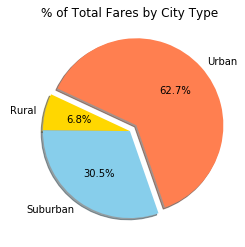

In [21]:
# Calculate Type Percents
type_df = reorganized_data_df.groupby(["type"])
total_fare = type_df["fare"].sum()
pie_df = pd.DataFrame({"Total Fare by City" : total_fare})
# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)
pie_df.plot(kind = "pie", y= pie_df.keys(), explode=explode, 
            colors = colors, autopct="%1.1f%%", startangle = 155, 
            title = "% of Total Fares by City Type"
           , legend = False, shadow = True)
plt.axis("off")
# Save Figure
plt.savefig("Total Fares by City Type")

In [ ]:
plt.show()

## Total Rides by City Type

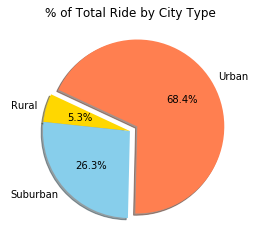

In [27]:
# Calculate Ride Percents
total_ride = type_df["ride_id"].count()
pie2_df= pd.DataFrame({"Total Ride by City": total_ride})
# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)
pie2_df.plot(kind = "pie", y= pie2_df.keys(), explode=explode, 
            colors = colors, autopct="%1.1f%%", startangle = 155, 
            title = "% of Total Ride by City Type"
           , legend = False, shadow = True)
plt.axis("off")
# Save Figure
plt.savefig("Total Ride by City Type")

In [ ]:
plt.show()

## Total Drivers by City Type

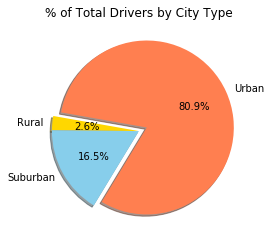

In [41]:
# Calculate Driver Percents
driver_type = simplify_df.groupby("type")
total_driver = driver_type["Total Number of Driver Per City"].sum()
pie3_df= pd.DataFrame({"Total Drivers by City": total_driver})
# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)
pie3_df.plot(kind = "pie", y= pie3_df.keys(), explode=explode, 
            colors = colors, autopct="%1.1f%%", startangle = 170, 
            title = "% of Total Drivers by City Type"
           , legend = False, shadow = True)
plt.axis("off")
# Save Figure
plt.savefig("Total Drivers by City Type")

In [40]:
plt.show()